In [175]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
def airdensity(altitude,g):
    T0 = 288.15  # sea level temperature, K
    rho0 = 1.225  # sea level density, kg/m^3
    L = 0.0065   # temperature lapse rate, K/m
    R = 287.1    # specific gas constant, J/(kg*K)

    # calculate temperature at altitude
    T = T0 - L * altitude

    # calculate pressure at altitude
    p = 101325 * (T/T0)**(g/(L*R))

    # calculate air density at altitude
    rho = p/(R*T)

    return rho


In [177]:
wetmass=1
propellant=0.094
burntime=3.6
totalimpulse=50.4
A=0.1
Cd=0.75


drymass=wetmass-propellant
averagethrust=totalimpulse/burntime
massflowrate=propellant/burntime

time=np.linspace(0,10,10000, False)


#defining variables
thrust=np.zeros(len(time))
mass=np.zeros(len(time))
acceleration=np.zeros(len(time))
velocity=np.zeros(len(time))
altitude=np.zeros(len(time))
gravity=np.zeros(len(time))
rho=np.zeros(len(time))
drag=np.zeros(len(time))

#setting initial values
thrust[0]=averagethrust
mass[0]=wetmass
gravity[0]=((6.6743 * 10**(-11) * 5.9721 * 10**24) / (6371000)**2)
acceleration[0]=thrust[0]/mass[0] - gravity[0]
rho[0]=airdensity(altitude[0],gravity[0])

In [178]:
#this loop calculating acceleration, velocity, altitude and gravity with iterating
for i in range(1, len(time)):
    #declaring dt and dh
    dt=time[i]-time[i-1]
    dh=velocity[i-1]*dt+0.5*acceleration[i-1]* dt**2
   
    rho[i]=airdensity(altitude[i],gravity[i])
    drag[i]=0.5*rho[i]*Cd*A
    
    
    #updating altitude and gravity
    altitude[i]=altitude[i-1]+dh
    gravity[i]=((6.6743 * 10**(-11) * 5.9721 * 10**24) / (6371000 + altitude[i])**2)
    
    #calculating thrust, mass and acceleration
    thrust[i]=(averagethrust if time[i]<burntime else 0)
    mass[i]=(wetmass-time[i]*massflowrate if time[i]<burntime else drymass)
    if(velocity[i]>=0):
        acceleration[i]=thrust[i]/mass[i]-gravity[i]-(drag[i]*velocity[i-1]**2)/mass[i]
    else:
        acceleration[i]=thrust[i]/mass[i]-gravity[i]+(drag[i]*velocity[i-1]**2)/mass[i]

    
    #calculating velocity with trapezoid rule
    velocity[i]=velocity[i-1]+0.5*(acceleration[i-1]+acceleration[i])*dt
    
    #setting setting negative values of altitude to 0
altitude = np.maximum(altitude, 0)
    #declaring variable ground which is where altitude is equal 0
ground=np.where(altitude==0)
    
    #setting velocity and acceleration 0, where rocket is on the ground.
velocity[ground]=0
acceleration[ground]=0

<ipython-input-178-b05790e77f0d>:13: RuntimeWarning: overflow encountered in double_scalars
  gravity[i]=((6.6743 * 10**(-11) * 5.9721 * 10**24) / (6371000 + altitude[i])**2)
<ipython-input-178-b05790e77f0d>:19: RuntimeWarning: overflow encountered in double_scalars
  acceleration[i]=thrust[i]/mass[i]-gravity[i]-(drag[i]*velocity[i-1]**2)/mass[i]


[0.         0.00418004 0.00836046 ... 0.         0.         0.        ]
[0.         4.18022771 4.18059249 ... 0.         0.         0.        ]


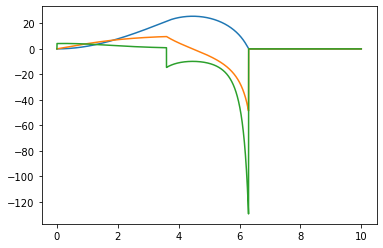

In [179]:
plt.plot(time,altitude)
plt.plot(time,velocity)
plt.plot(time,acceleration)

print(velocity)

print(acceleration)